In [116]:
import tensorflow as tf
from keras import layers,models

In [115]:
import keras
from keras import utils
import numpy as np
import matplotlib.pyplot as plt

train_data = utils.image_dataset_from_directory(
    directory="C:/Users/TRETEC/Pictures/img_align_celeba"
    ,  # Corrected directory path
    labels=None,
    color_mode="rgb",
    image_size=(64, 64),
    batch_size=128,
    shuffle=True,
    seed=42,
    interpolation="bilinear"
)


Found 182449 files.


In [117]:
def preprocess_image(image):
    img=(tf.cast(image, "float32") - 127.5)/127.5
    return img

In [118]:
train=train_data.map(lambda x : preprocess_image(x))


In [119]:
discriminator_input=layers.Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=4, strides=2, padding="same", use_bias = False)(discriminator_input)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(128, kernel_size=4, strides=2, padding="same", use_bias =False)(x)
x = layers.BatchNormalization(momentum = 0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(256, kernel_size=4, strides=2, padding="same", use_bias =False)(x)
x = layers.BatchNormalization(momentum = 0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(512, kernel_size=4, strides=2, padding="same", use_bias =False)(x)
x = layers.BatchNormalization(momentum = 0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(1, kernel_size=4, strides=1, padding="valid", use_bias = False,activation = 'sigmoid')(x)
discriminator_output = layers.Flatten()(x)

In [120]:
discriminator = models.Model(discriminator_input, discriminator_output)
discriminator.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │       131,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 256)      │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 512)      │     2,097,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1, 1, 1)        │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,767,360 (10.56 MB)

 Trainable params: 2,765,568 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [121]:
generator_input = layers.Input(shape=(100,))
x = layers.Reshape((1, 1, 100))(generator_input)
x = layers.Conv2DTranspose(512, kernel_size=4, strides=1, padding="valid",use_bias = False)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same",use_bias = False)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same",use_bias = False)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", use_bias= False)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
generator_output = layers.Conv2DTranspose(3, kernel_size=4, strides=2,padding="same", use_bias = False, activation = 'tanh')(x)

In [122]:
generator=models.Model(generator_input, generator_output)
generator.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 1, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 4, 4, 512)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 8, 8, 256)      │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 16, 16, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 32, 32, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 64, 64, 3)      │         3,072 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,578,624 (13.65 MB)

 Trainable params: 3,576,704 (13.64 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [123]:
from keras.models import Model
from keras import losses ,optimizers,metrics

In [124]:
class DCGAN(Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(DCGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
    def compile(self, d_optimizer, g_optimizer):
        super(DCGAN, self).compile()
        self.loss_fn = losses.BinaryCrossentropy()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_metric = metrics.Mean(name="d_loss")
        self.g_loss_metric = metrics.Mean(name="g_loss")
    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]
    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size,self.latent_dim))
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator(random_latent_vectors, training =True)
            real_predictions = self.discriminator(real_images, training = True)
            fake_predictions = self.discriminator(generated_images, training =True)
            real_labels = tf.ones_like(real_predictions)
            real_noisy_labels = real_labels + 0.1 *tf.random.uniform(tf.shape(real_predictions))
            fake_labels = tf.zeros_like(fake_predictions)
            fake_noisy_labels = fake_labels - 0.1 *tf.random.uniform(tf.shape(fake_predictions))
            d_real_loss = self.loss_fn(real_noisy_labels, real_predictions)
            d_fake_loss = self.loss_fn(fake_noisy_labels, fake_predictions)
            d_loss = (d_real_loss + d_fake_loss) / 2.0
            g_loss = self.loss_fn(real_labels, fake_predictions)
            gradients_of_discriminator = disc_tape.gradient(d_loss,self.discriminator.trainable_variables)
            gradients_of_generator = gen_tape.gradient(g_loss,self.generator.trainable_variables)
            self.d_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))
            self.g_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
            self.d_loss_metric.update_state(d_loss)
            self.g_loss_metric.update_state(g_loss)
        return {m.name: m.result() for m in self.metrics}
dcgan = DCGAN(discriminator=discriminator, generator=generator, latent_dim=100)
dcgan.compile(
d_optimizer=optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5, beta_2 =0.999),
g_optimizer=optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5, beta_2 =0.999),
)
dcgan.fit(train, epochs=100)

Epoch 1/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 3005s 2s/step - d_loss: 5.0829e-04 - g_loss: 5.2807
Epoch 2/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2786s 2s/step - d_loss: 0.0522 - g_loss: 4.6428
Epoch 3/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2765s 2s/step - d_loss: 0.0677 - g_loss: 4.8725
Epoch 4/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2739s 2s/step - d_loss: 0.1676 - g_loss: 4.1553
Epoch 5/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2748s 2s/step - d_loss: 0.2048 - g_loss: 3.5526
Epoch 6/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2753s 2s/step - d_loss: 0.2133 - g_loss: 3.4514
Epoch 7/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2753s 2s/step - d_loss: 0.1978 - g_loss: 3.5524
Epoch 8/100
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 2760s 2s/step - d_loss: 0.1716 - g_loss: 3.6454
Epoch 9/100
 505/1426 ━━━━━━━━━━━━━━━━━━━━ 29:45 2s/step - d_loss: 0.1305 - g_loss: 3.9200

KeyboardInterrupt: 

In [169]:
A=tf.random.normal((1,100))


In [170]:
B=generator(A)

In [171]:
def reprocess(img):
    return img+1
B=reprocess(B)

In [172]:
print(np.max(B),np.min(B))
B=tf.reshape(B,(64,64,3))


1.9500912 0.0014926195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


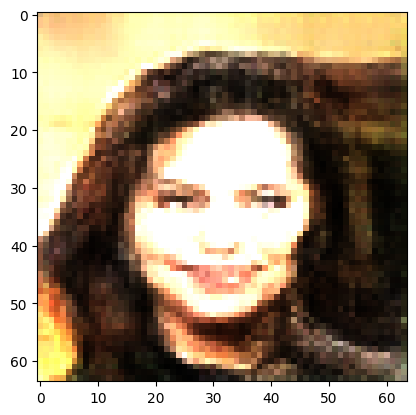

In [173]:
plt.imshow(B)